# SUOX


Sulfite Oxidase Deficiency

Data from [Li JT, et al. Mutation analysis of SUOX in isolated sulfite oxidase deficiency with ectopia lentis as the presenting feature: insights into genotype-phenotype correlation](https://pubmed.ncbi.nlm.nih.gov/36303223/)

In [1]:
import genophenocorr
from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder
from genophenocorr.preprocessing import VVTranscriptCoordinateService
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from genophenocorr.model import VariantEffect
from genophenocorr.model.genome import GRCh38
from genophenocorr.analysis.predicate import PatientCategories
from genophenocorr.view import CohortViewable, ProteinVisualizable, ProteinVisualizer
from IPython.display import HTML, display
import hpotk
store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {genophenocorr.__version__}")

Loaded HPO v2024-04-26
Using genophenocorr version 0.1.1dev


### Setup

In [2]:
fpath_phenopackets = 'phenopackets'
SUOX_transcript_id = 'NM_001032386.2'
SUOX_protein_id = "NP_001027558.1"

### Load Phenopackets

In [3]:
cohort_creator = configure_caching_cohort_creator(hpo)
cohort = load_phenopacket_folder(fpath_phenopackets, cohort_creator)
viewer = CohortViewable(hpo)
display(HTML(viewer.process(cohort=cohort, transcript_id=SUOX_transcript_id)))

Patients Created: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [01:29<00:00,  2.55s/it]
Validated under none policy
No errors or warnings were found


HPO Term,ID,Annotation Count
Seizure,HP:0001250,28
Hypotonia,HP:0001252,15
Sulfocysteinuria,HP:0032350,13
Hypertonia,HP:0001276,11
Microcephaly,HP:0000252,10
Hypohomocysteinemia,HP:0020222,10
Hypohomocysteinemia,HP:0020222,10
Neurodevelopmental delay,HP:0012758,8
Ectopia lentis,HP:0001083,7
Hypocystinemia,HP:0500152,7


In [5]:
from genophenocorr.preprocessing import UniprotProteinMetadataService

txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(SUOX_transcript_id)
protein_id = 'NP_037407.4' 

pms = UniprotProteinMetadataService()
protein_meta = pms.annotate(SUOX_protein_id)

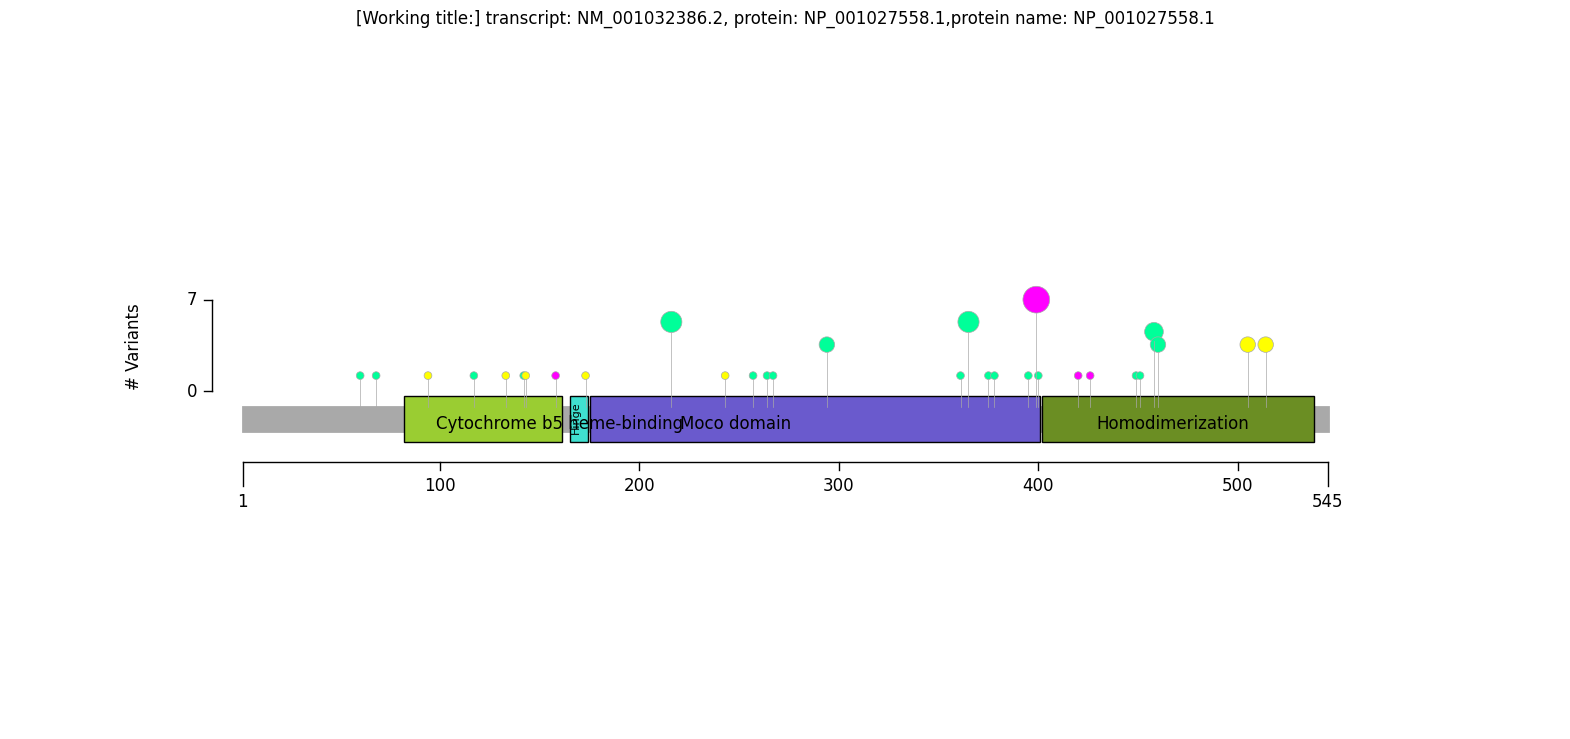

In [6]:
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

## Genotype Phenotype Correlation Analysis analysis

In [10]:

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = True
analysis_config.pval_correction = 'fdr_bh'
analysis_config.min_perc_patients_w_hpo = 0.1
#analysis_config.heuristic_strategy()
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

## Run the analyses

Compare missense variants vs. other variants.

In [13]:
missense = analysis.compare_by_recessive_variant_effect(VariantEffect.MISSENSE_VARIANT, SUOX_transcript_id)
missense.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_001032386.2                  Both            One  \
                                                   Count Percent  Count   
Cognitive regression [HP:0034332]                    3/4     75%   3/13   
Seizure [HP:0001250]                                 3/5     60%  14/19   
Hypotonia [HP:0001252]                               3/3    100%   9/13   
Abnormality of extrapyramidal motor function [H...   3/4     75%   6/13   
Neurodevelopmental delay [HP:0012758]                0/4      0%   4/13   
...                                                  ...     ...    ...   
Abnormality of urine homeostasis [HP:0003110]        1/1    100%  11/11   
Abnormal circulating homocysteine concentration...   4/4    100%    5/5   
Decreased head circumference [HP:0040195]            1/1    100%    5/5   
Aplasia/Hypoplasia of the cerebrum [HP:0007364]      1/1    100%    5/5   
Abnormality of skull size [HP:0000240]               1/1    100%    5/5   

MISSENSE_VARIANT on NM_001032386.2                         Neither          \
                                                   Percent   Count Percent   
Cognitive regression [HP:0034332]                      23%     0/8      0%   
Seizure [HP:0001250]                                   74%   11/11    100%   
Hypotonia [HP:0001252]                                 69%     3/7     43%   
Abnormality of extrapyramidal motor function [H...     46%     2/8     25%   
Neurodevelopmental delay [HP:0012758]                  31%     4/8     50%   
...                                                    ...     ...     ...   
Abnormality of urine homeostasis [HP:0003110]         100%     2/2    100%   
Abnormal circulating homocysteine concentration...    100%     1/1    100%   
Decreased head circumference [HP:0040195]             100%     4/4    100%   
Aplasia/Hypoplasia of the cerebrum [HP:0007364]       100%     4/4    100%   
Abnormality of skull size [HP:0000240]                100%     4/4    100%   

MISSENSE_VARIANT on NM_001032386.2                                              
                                                     p value Corrected p value  
Cognitive regression [HP:0034332]                   0.016815               1.0  
Seizure [HP:0001250]                                0.098607               1.0  
Hypotonia [HP:0001252]                              0.173173               1.0  
Abnormality of extrapyramidal motor function [H...  0.262511               1.0  
Neurodevelopmental delay [HP:0012758]               0.270175               1.0  
...                                                      ...               ...  
Abnormality of urine homeostasis [HP:0003110]       1.000000               1.0  
Abnormal circulating homocysteine concentration...  1.000000               1.0  
Decreased head circumference [HP:0040195]           1.000000               1.0  
Aplasia/Hypoplasia of the cerebrum [HP:0007364]     1.000000               1.0  
Abnormality of skull size [HP:0000240]              1.000000               1.0  

[71 rows x 8 columns]

Test for presence of genotype-phenotype correlations between subjects with >=1 allele of a variant vs. the others.

In [12]:
by_variant = analysis.compare_by_recessive_variant_key('12_56004589_56004589_C_G')
by_variant.summarize(hpo, PatientCategories.YES)

>=1 allele of the variant 12_56004589_56004589_C_G  Both           One  \
                                                   Count Percent Count   
Hypotonia [HP:0001252]                               0/0      0%   1/5   
Neurodevelopmental delay [HP:0012758]                0/0      0%   0/6   
Abnormality of extrapyramidal motor function [H...   0/0      0%   1/6   
Cognitive regression [HP:0034332]                    0/0      0%   0/6   
Ectopia lentis [HP:0001083]                          0/0      0%   2/3   
...                                                  ...     ...   ...   
Abnormality of urine homeostasis [HP:0003110]        0/0      0%   2/2   
Abnormal circulating homocysteine concentration...   0/0      0%   2/2   
Decreased head circumference [HP:0040195]            0/0      0%   2/2   
Aplasia/Hypoplasia of the cerebrum [HP:0007364]      0/0      0%   2/2   
Abnormality of skull size [HP:0000240]               0/0      0%   2/2   

>=1 allele of the variant 12_56004589_56004589_C_G         Neither          \
                                                   Percent   Count Percent   
Hypotonia [HP:0001252]                                 20%   14/18     78%   
Neurodevelopmental delay [HP:0012758]                   0%    8/19     42%   
Abnormality of extrapyramidal motor function [H...     17%   10/19     53%   
Cognitive regression [HP:0034332]                       0%    6/19     32%   
Ectopia lentis [HP:0001083]                            67%    5/15     33%   
...                                                    ...     ...     ...   
Abnormality of urine homeostasis [HP:0003110]         100%   12/12    100%   
Abnormal circulating homocysteine concentration...    100%     8/8    100%   
Decreased head circumference [HP:0040195]             100%     8/8    100%   
Aplasia/Hypoplasia of the cerebrum [HP:0007364]       100%     8/8    100%   
Abnormality of skull size [HP:0000240]                100%     8/8    100%   

>=1 allele of the variant 12_56004589_56004589_C_G                              
                                                     p value Corrected p value  
Hypotonia [HP:0001252]                              0.032869               1.0  
Neurodevelopmental delay [HP:0012758]               0.129170               1.0  
Abnormality of extrapyramidal motor function [H...  0.180435               1.0  
Cognitive regression [HP:0034332]                   0.277764               1.0  
Ectopia lentis [HP:0001083]                         0.528186               1.0  
...                                                      ...               ...  
Abnormality of urine homeostasis [HP:0003110]       1.000000               1.0  
Abnormal circulating homocysteine concentration...  1.000000               1.0  
Decreased head circumference [HP:0040195]           1.000000               1.0  
Aplasia/Hypoplasia of the cerebrum [HP:0007364]     1.000000               1.0  
Abnormality of skull size [HP:0000240]              1.000000               1.0  

[71 rows x 8 columns]

TODO - finalize!